<font color='blue'><h1>Telecom: Identifying Ineffective Operators </h1></font>

# Project description 

*The virtual telephony service CallMeMaybe is developing a new function that will give supervisors information on the least effective operators. An operator is considered ineffective if they have a large number of missed incoming calls (internal and external) and a long waiting time for incoming calls. Moreover, if an operator is supposed to make outgoing calls, a small number of them is also a sign of ineffectiveness.The datasets contain data on the use of the virtual telephony service CallMeMaybe. Its clients are organizations that need to distribute large numbers of incoming calls among various operators, or make outgoing calls through their operators. Operators can also make internal calls to communicate with one another. These calls go through CallMeMaybe's network.*

The dataset `telecom_dataset_us.csv` contains the following columns:
1. user_id — client account ID
2. date` — date the statistics were retrieved
3. direction` — call direction (`out` for outgoing, `in` for incoming)
4. internal` — whether the call was internal (between a client's operators)
5. operator_id` — operator identifier
6. is_missed_call` — whether the call was missed
7. calls_count` — number of calls
8. call_duration` — call duration (excluding waiting time)
9. total_call_duration` — call duration (including waiting time)
 
The dataset telecom_clients_us.csv contains the following columns:
1. user_id
2. tarrif_plan
3. date_start

### Table of Contents
* [1. Download the data and prepare it for analysis](#h1)
    * [1.1 Importing library files](#sh1.1)
    * [1.2 Reading given data](#sh1.2)
    * [1.3 Data Preprocessing](#sh1.3)
    * [1.4 Conclusion](#sh1.4)
* [2. Carry out exploratory data analysis](#h2)
    * [2.1 Analysing outgoing and incoming calls](#sh2.1)
        * [2.1.1 plotting pie chart of incoming and outgoing calls ](#sh2.1.1)
        * [2.1.1 Looking at the average number of incoming and outgoing calls ](#sh2.1.1)
        * [2.1.2 Analyse the waiting time for incoming calls](#sh2.1.2)
        * [2.1.3 Determine the number of ineffective operators. Plotting histograms](#sh2.1.3)
    * [2.2 Plotting histogram for tarrif plan and anlyzing the duration of calls per day ](#sh2.2)
    * [2.3 Describe the customers' behavior. Find the tariff_plan, call duration, and missed call of users per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions. ](#sh2.3)
* [3. Hypothesis](#h3)
   * [3.1  Average call duration for ineffective operators and effective operators are the same. ](#sh2.1) 
* [4. Conclusion](#h4)

<font color='green'><h2> Step 1.IMPORTING FILES AND DOWNLOADING THE DATA <a class="anchor" id="h1"></a></h2></font>

<font color='green'><h3>Importing library files<a class="anchor" id="h3.5"></a></h3></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime 
import matplotlib.dates
from scipy import stats as st

<font color='green'><h3>Reading given data<a class="anchor" id="h3.5"></a></h3></font>

In [2]:
# Open data files telecom dataset
df_data = pd.read_csv('/datasets/telecom_dataset_us.csv')

# Study general information
df_data.info()
display(df_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
user_id                53902 non-null int64
date                   53902 non-null object
direction              53902 non-null object
internal               53785 non-null object
operator_id            45730 non-null float64
is_missed_call         53902 non-null bool
calls_count            53902 non-null int64
call_duration          53902 non-null int64
total_call_duration    53902 non-null int64
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [3]:
# Open data files
df_clients = pd.read_csv('/datasets/telecom_clients_us.csv')

# Study general information
df_clients.info()
display(df_clients.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
user_id        732 non-null int64
tariff_plan    732 non-null object
date_start     732 non-null object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


Here we read out general details of the two datasets df_data and df_clients 
The  dataset telecom_dataset_us.csv contains the following columns:
1. user_id — client account ID
2. date — date the statistics were retrieved
3. direction — call direction (out for outgoing, in for incoming)
4. internal -whether the call was internal (between a client's operators)
5. operator_id -operator identifier
6. is_missed_call - whether call is missed
7. call_cóunt - number of call
8. call_duration -excluding waiting time
9. total_call duration - including waiting time 
<br>
<br>
The dataset telecom_clients_us.csv has the following columns:
*. user_id - client id
*. tariff_plan - client's current plan
*. date_start - client registration date 

<font color='green'><h3>DATA PREPROCESSING<a class="anchor" id="h3.5"></a></h3></font>


In [4]:
#checking and analysing different dataframes
list_of_dfs = {'Telecom_data':df_data,'Telecom_client':df_clients}

for key in list_of_dfs:
    print(key)
    x = list_of_dfs[key][list_of_dfs[key].duplicated()]
    print(x)     


Telecom_data
       user_id                       date direction internal  operator_id  \
8       166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
28      166377  2019-08-12 00:00:00+03:00        in    False          NaN   
44      166377  2019-08-14 00:00:00+03:00       out    False     880026.0   
45      166377  2019-08-14 00:00:00+03:00        in    False          NaN   
51      166377  2019-08-15 00:00:00+03:00       out    False     880026.0   
...        ...                        ...       ...      ...          ...   
53869   168601  2019-11-25 00:00:00+03:00        in    False     952914.0   
53874   168601  2019-11-26 00:00:00+03:00        in    False     952914.0   
53875   168601  2019-11-26 00:00:00+03:00        in    False          NaN   
53885   168603  2019-11-20 00:00:00+03:00       out    False     959118.0   
53900   168606  2019-11-15 00:00:00+03:00       out     True     957922.0   

       is_missed_call  calls_count  call_duration  total_call_

In [5]:
#checking duplicates in the dataframes and dropping duplicates
# drop null values for internal and operator_id
df_data.drop_duplicates(inplace = True)
df_data.dropna(subset=['internal', 'operator_id'], inplace=True)


In [6]:
#converting date to datetime in both dataframes df_data and df_clients
df_data['date'] = pd.to_datetime(df_data['date'], format="%Y-%m-%d").dt.date
df_clients['date_start'] = pd.to_datetime(df_clients['date_start'], format="%Y-%m-%d").dt.date
# convert operator_id from float to int
df_data['operator_id'] = df_data['operator_id'].astype(int)

data = pd.merge(df_data, df_clients, on='user_id')


In [7]:
#checking and removing outliers by IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

user_id                 1045.0
operator_id            36918.0
is_missed_call             1.0
calls_count               13.0
call_duration            772.0
total_call_duration     1040.0
dtype: float64


(34120, 11)

In data preprocessing phase,first of all we will check data duplicate entries in both the dataframes ,then removing unwanted data , and changing the datatypes for further analysis of calculation
1. checking duplicated data it can be seen that in df_data there are 4900 rows with duplicate entries and in df_clients there it shows empty dataframe.Therefore we removed the duplicate entries.
2. drop null values for internal and operator_id  columns in combination.
3. then we converted the dates in both datasets df_clients and df_data into datetime format and changed the operator_id to int 
4. we removed the outliers by using IQR method, as The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.we are left with 34120 rows.

**CONCLUSION**


<font color='green'><h2> Step 2.Carry out exploratory data analysis<a class="anchor" id="h1"></a></h2></font>

<font color='green'><h3>Analysing outgoing and incoming calls<a class="anchor" id="h3.5"></a></h3></font>



<font color='green'><h4>plotting pie chart of incoming and outgoing calls<a class="anchor" id="h4"></a></h4></font>



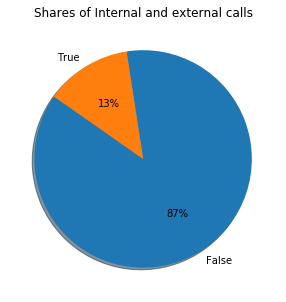

In [8]:
# plotting pie chart of incoming and outgoing calls
plt.figure(figsize=(10, 5))

analyse_calls = df_data.groupby('internal')['operator_id'].count().reset_index()
analyse_calls.columns = ['internal', 'count']

labels = ['False', 'True']
plt.pie(analyse_calls['count'], labels=labels, autopct='%0.f%%', shadow=True, startangle=145)
plt.title('Shares of Internal and external calls')
plt.show()

while analysing the internal and external calls it can be seen from the pie chart above that 87 percent of the calls are external calls , only 13% are internal calls with the clients.

<font color='green'><h4>Looking at the average number of incoming and outgoing calls <a class="anchor" id="h4"></a></h4></font>



In [9]:
# calculating waiting time 
data['in_waiting_time_sec'] = data['total_call_duration'] - data['call_duration']
outgoing_data = data[data['direction'] == 'out']
incoming_data = data[data['direction'] == 'in']
#calculating average number of incoming and outgoing calls
avg_outgoing_per_op = outgoing_data.groupby('operator_id').agg({'calls_count' : 'sum'}).mean().round() 
avg_incoming_per_op = incoming_data.groupby('operator_id').agg({'calls_count' : 'sum'}).mean().round()
print('The average number of outgoing calls per operator is: ' + str(avg_outgoing_per_op))
print('The average number of incoming calls per operator is: ' + str(avg_incoming_per_op))



The average number of outgoing calls per operator is: calls_count    166.0
dtype: float64
The average number of incoming calls per operator is: calls_count    62.0
dtype: float64


 In this first of all we merged the tables and calculated waiting time it can be seen that most of the calls are outgoing ,as the average number of outgoing calls per operator is: 166.0 and incoming calls per operator is: 62.0, so the outgoing calls are more neraly 3 times to incoming calls

<font color='green'><h4>Analysing large number of missed calls <a class="anchor" id="h4"></a></h4></font>



In [10]:
# analysing data where missed calls is true and groupby operator_id
#op_missed_calls = incoming_data[incoming_data['is_missed_call'] == True]
op_missed_calls = (incoming_data[incoming_data['is_missed_call'] == True]
                       .groupby('operator_id')['calls_count']
                       .sum()
                       .reset_index())
op_missed_calls.columns = ['operator_id', 'missed_call_count']

avg_missed_incoming_calls_per_op = op_missed_calls.mean()['missed_call_count'].round()

# calculate 1 sigma to use as a measure
wait_mean = op_missed_calls['missed_call_count'].mean()
wait_std = op_missed_calls['missed_call_count'].std()
sigma = wait_mean + (1 * wait_std)

# group rows into missed callcategories
def determineMissedCalls(row):
    missed_call = row['missed_call_count']
    
    # if  num of missed calls per op is less than avg
    if missed_call < sigma:
        return 'False'
    else:
        return 'True'
    
op_missed_calls['many_missed_calls'] = op_missed_calls.apply(determineMissedCalls, axis=1)
display(op_missed_calls)

,operator_id,missed_call_count,many_missed_calls
0,882680,3,False
1,882684,4,False
2,882686,6,False
3,882690,2,False
4,884408,4,False
...,...,...,...
234,959312,7,False
235,960620,1,False
236,964510,2,False
237,964666,3,False


In this we analysed larged number of missed calls ,for that first of all we calculated missed_call_count for each operator then calculated mean  and then compared the total average number of missed call per operator for that operator. An operator is given False under many_missed_calls column if their average number of missed calls is less than the total average number of missed calls.we obtain many_missed _call in the bolean form.Here we found out that there are 239 operators with many missed calls


In [11]:
# the reviewer code:

# let's see the data:
incoming_data.head(2)

# the calls_count column contains the number of missing values, so it is better to use this way to calculate the 
# number of missing values per operator:
rev_op_missed_calls = (incoming_data[incoming_data['is_missed_call'] == True]
                       .groupby('operator_id')['calls_count']
                       .sum()
                       .reset_index())
rev_op_missed_calls.columns = ['operator_id', 'missed_call_count']
rev_op_missed_calls.head()

,operator_id,missed_call_count
0,882680,3
1,882684,4
2,882686,6
3,882690,2
4,884408,4


<font color='green'><h4>Analyse the waiting time for incoming calls <a class="anchor" id="h4"></a></h4></font>



In [12]:

# calculating mean and average waiting time for incoming calls 

avg_waiting_time_incoming_calls = incoming_data['in_waiting_time_sec'].mean().round()
print('The total average waiting time incoming calls: ' + str(avg_waiting_time_incoming_calls) + " seconds")

#get data where missed calls is true and calculating long waiting calls
op_waiting_time = incoming_data.groupby('operator_id')['in_waiting_time_sec'].mean().round().reset_index()
op_waiting_time
# calculate 1 sigma to use as a measure
wait_mean = incoming_data['in_waiting_time_sec'].mean()
wait_std = incoming_data['in_waiting_time_sec'].std()
sigma = wait_mean + (1 * wait_std)

# group rows into wait time categories
def determineWaitTime(row):
    wait_time = row['in_waiting_time_sec']
    
    # if avg operator wait time is less than total avg wait time, not long waiting op
    if wait_time < sigma:
        return 'False'
    else:
        return 'True'
    
# determine if operators have a long wait time or not
op_waiting_time['long_waiting_time'] = op_waiting_time.apply(determineWaitTime, axis=1)
display(op_waiting_time)

The total average waiting time incoming calls: 62.0 seconds


,operator_id,in_waiting_time_sec,long_waiting_time
0,879896,27.0,False
1,879898,30.0,False
2,880020,8.0,False
3,880022,14.0,False
4,880026,8.0,False
...,...,...,...
749,971102,18.0,False
750,971354,42.0,False
751,972412,25.0,False
752,972460,4.0,False


In this we analysed the waiting time by calculating The total average waiting time incoming calls: 98.0 seconds, taking waiting_time_sec per operator and calculating mean and then comparing the  total average number of waiting_time per operator for that operator. An operator is given False under long_waiting_time column if their average number of waiting_time is less than the total average number of waiting_time.Here we found out that there are 754 operators with long waiting time .

<font color='green'><h4>Determine the number of ineffective operators.<a class="anchor" id="h4"></a></h4></font>



In [13]:
 #calculate number of outgoing calls per operators
outgoing_per_op = (outgoing_data .groupby('operator_id')['calls_count']
                       .sum()
                       .reset_index())
outgoing_per_op.columns = ['operator_id', 'total_calls_count']

# calculate 1 sigma to use as a measure
wait_mean = outgoing_per_op['total_calls_count'].mean()
wait_std = outgoing_per_op['total_calls_count'].std()
sigma = wait_mean + (1 * wait_std)


# group rows into missed callcategories
def determineOutgoingCalls(row):
    outgoing_call = row['total_calls_count']
    
    # if op num of outgoing calls is greater than avg
    if outgoing_call > wait_mean:
        return 'False'
    else:
        return 'True'
    
outgoing_per_op['few_outgoing_calls'] = outgoing_per_op.apply(determineOutgoingCalls, axis=1)
#display(outgoing_per_op[outgoing_per_op['few_outgoing_calls'] == 'True'])

# combine dataframes
total_in_operators = pd.merge(op_missed_calls, op_waiting_time, on='operator_id')
total_in_operators = pd.merge(total_in_operators,outgoing_per_op , on='operator_id')
total_in_operators



,operator_id,missed_call_count,many_missed_calls,in_waiting_time_sec,long_waiting_time,total_calls_count,few_outgoing_calls
0,882684,4,False,71.0,False,401,False
1,882686,6,False,78.0,False,899,False
2,882690,2,False,275.0,True,328,False
3,884408,4,False,66.0,False,25,True
4,885876,20,True,79.0,False,315,False
...,...,...,...,...,...,...,...
193,959312,7,False,32.0,False,96,True
194,960620,1,False,75.0,False,58,True
195,964510,2,False,25.0,False,100,True
196,964666,3,False,64.0,False,34,True


In [14]:
# identify ineffective ops for incoming calls
ineffective_incoming_ops = total_in_operators[(total_in_operators['many_missed_calls'] == 'True') & (total_in_operators['long_waiting_time'] == 'True')]
display(ineffective_incoming_ops)


# identify ineffective ops for outgoing calls
ineffective_outgoing_ops = total_in_operators[total_in_operators['few_outgoing_calls'] == 'True']
display(ineffective_outgoing_ops)


# concatenate results together
result = pd.concat([ineffective_incoming_ops, ineffective_outgoing_ops], ignore_index=True, sort=False)
display(result)
result.info()

,operator_id,missed_call_count,many_missed_calls,in_waiting_time_sec,long_waiting_time,total_calls_count,few_outgoing_calls
91,919554,11,True,381.0,True,8,True
168,944216,24,True,152.0,True,119,True
169,944218,15,True,176.0,True,164,True
170,944220,18,True,194.0,True,221,False


,operator_id,missed_call_count,many_missed_calls,in_waiting_time_sec,long_waiting_time,total_calls_count,few_outgoing_calls
3,884408,4,False,66.0,False,25,True
5,885890,26,True,108.0,False,10,True
7,888406,1,False,36.0,False,6,True
10,888868,1,False,31.0,False,52,True
12,890228,1,False,17.0,False,86,True
...,...,...,...,...,...,...,...
192,958640,1,False,10.0,False,11,True
193,959312,7,False,32.0,False,96,True
194,960620,1,False,75.0,False,58,True
195,964510,2,False,25.0,False,100,True


,operator_id,missed_call_count,many_missed_calls,in_waiting_time_sec,long_waiting_time,total_calls_count,few_outgoing_calls
0,919554,11,True,381.0,True,8,True
1,944216,24,True,152.0,True,119,True
2,944218,15,True,176.0,True,164,True
3,944220,18,True,194.0,True,221,False
4,884408,4,False,66.0,False,25,True
...,...,...,...,...,...,...,...
99,958640,1,False,10.0,False,11,True
100,959312,7,False,32.0,False,96,True
101,960620,1,False,75.0,False,58,True
102,964510,2,False,25.0,False,100,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
operator_id            104 non-null int64
missed_call_count      104 non-null int64
many_missed_calls      104 non-null object
in_waiting_time_sec    104 non-null float64
long_waiting_time      104 non-null object
total_calls_count      104 non-null int64
few_outgoing_calls     104 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 5.8+ KB


First of all we calculated number of outgoing calls per operators,calculated 1 sigma to use as a measure and to identify the operators with less than average number of outgoing calls, we calculated the average number of outgoing calls per operator and then compared the total average number of missed calls per operator for that operator. An operator is given False under few_outgoing_calls if their average number of ouitgoing calls is greater than the total average number of outgoing calls.After that we analysed the inefeective operator and defined it them, that has a long waiting time (for both internal and external calls) and has many missed calls. Additionally, operators who make few outgoing calls (if they are supposed to) are considered ineffective.

After merging the tables we concluded that
1. in ineffective incoming calls out of there are 4 ineffetive operators
2. in ineffective outgoing calls we found out there are 100 ineffective operators

Hence we have identified a total of 104 ineffective ones as defined by their measures.



<font color='green'><h3>Describe the customers' behavior. Find the tariff_plan, call duration, and missed call of users per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.<a class="anchor" id="h3.5"></a></h3></font>

In [15]:
months = 4
data['duration_per_month'] = data['call_duration'] / months
data['waitingtime_per_month'] = data['in_waiting_time_sec'] / months


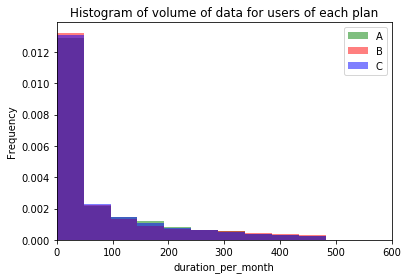

In [16]:
x1 = data.loc[data.tariff_plan=='A', 'duration_per_month']
x2 = data.loc[data.tariff_plan=='B', 'duration_per_month']
x3 = data.loc[data.tariff_plan=='C', 'duration_per_month']

kwargs = dict(alpha=0.5, bins=10,density=True)

plt.hist(x1, **kwargs, color='g', label='A')
plt.hist(x2, **kwargs, color='r', label='B')
plt.hist(x3, **kwargs, color='b', label='C')

plt.gca().set(title='Histogram of volume of data for users of each plan', ylabel='Frequency',xlabel='duration_per_month')
plt.xlim(0,600)
plt.legend();

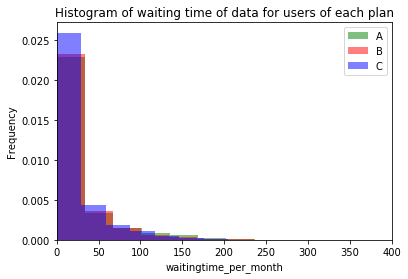

In [17]:
x1 = data.loc[data.tariff_plan=='A', 'waitingtime_per_month']
x2 = data.loc[data.tariff_plan=='B', 'waitingtime_per_month']
x3 = data.loc[data.tariff_plan=='C', 'waitingtime_per_month']

kwargs = dict(alpha=0.5, bins=10,density=True)

plt.hist(x1, **kwargs, color='g', label='A')
plt.hist(x2, **kwargs, color='r', label='B')
plt.hist(x3, **kwargs, color='b', label='C')

plt.gca().set(title='Histogram of waiting time of data for users of each plan', ylabel='Frequency',xlabel='waitingtime_per_month')
plt.xlim(0,400)
plt.legend();

In [18]:
#calculating mean and variance of plan surf groupby userid
df_A = data.query('tariff_plan == "A"').groupby(['user_id'])['duration_per_month','waitingtime_per_month'].mean()
variance_surf = np.var(df_A)
print(variance_surf)

duration_per_month       1169.390978
waitingtime_per_month     424.235302
dtype: float64


In [19]:
#calculating mean and variance of plan surf groupby userid
df_B = data.query('tariff_plan == "B"').groupby(['user_id'])['duration_per_month','waitingtime_per_month'].mean()
variance_surf = np.var(df_B)
print(variance_surf)

duration_per_month       1208.501393
waitingtime_per_month     246.113718
dtype: float64


In [20]:
#calculating mean and variance of plan surf groupby userid
df_C = data.query('tariff_plan == "C"').groupby(['user_id'])['duration_per_month','waitingtime_per_month'].mean()
variance_surf = np.var(df_C)
print(variance_surf)

duration_per_month       1405.737215
waitingtime_per_month     212.192941
dtype: float64


Here we calculated the customers behavior; tariff_plan, call duration, and missed call of users per month. Calculate the mean, dispersion, and standard deviation. Plotted histograms.from the figures it can be seen that tariff plan A  shows the highest number of values for waiting time and call duration per_month,as still there are only 10% users from A plan and when we analysed the histograms it can be seen that B shows the better of values than A and C and has the less waiting time among all the users.

<font color='green'><h3>Plotting histogram for duration of calls per day and analyzing the tariff plan <a class="anchor" id="h3.5"></a></h3></font>

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


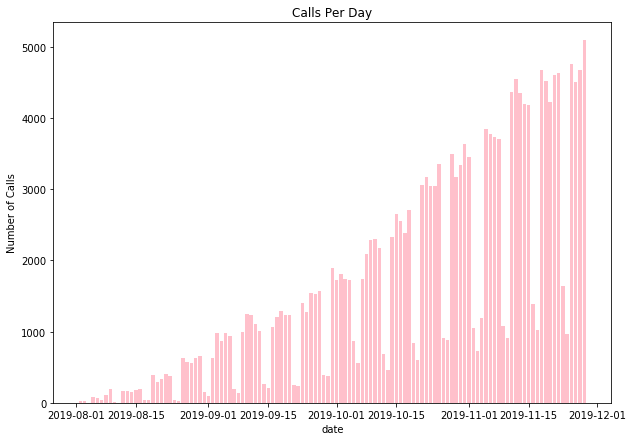

           date  calls_count
0    2019-08-02           19
1    2019-08-03           27
2    2019-08-04            4
3    2019-08-05           80
4    2019-08-06           67
..          ...          ...
113  2019-11-24          968
114  2019-11-25         4765
115  2019-11-26         4505
116  2019-11-27         4673
117  2019-11-28         5093

[118 rows x 2 columns]


In [21]:
fig = plt.figure(figsize=(10,7))
#data.groupby('date').agg({'calls_count' : 'sum'})

x = data.groupby('date').agg({'calls_count' : 'sum'}).reset_index() 
plt.bar(x['date'],x['calls_count'],color='pink')
plt.title('Calls Per Day')
plt.xlabel('date')
plt.ylabel('Number of Calls')
plt.show()
print(x)

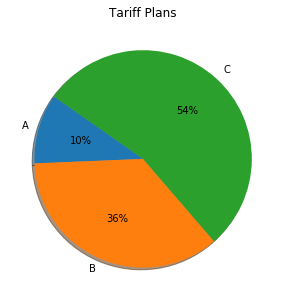

In [22]:
#analysing tariff plans
plt.figure(figsize=(10, 5))

tariff = df_clients.groupby('tariff_plan')['user_id'].count().reset_index()
tariff.columns = ['tariff_plan', 'count']


labels = ['A', 'B', 'C']
plt.pie(tariff['count'], labels=labels, autopct='%0.f%%', shadow=True, startangle=145)
plt.title('Tariff Plans')
plt.show()

In this we Plotted the  histogram for duration of calls per day and analyzing the tariff plan
1. for the duration of calls it can be seen that  calls are increasing with the time .means per day day calls is increasing with the date .though every month there is some fluctuations some day there is high peak some weak low peak, but still overall the graph is in increasing phase.
2. analysing the tariff plan it is clearly visible that tariff plan A user are the least of 10% ,B is of 36% and C is the highest of 54%

<font color='green'><h2> Hypothesis <a class="anchor" id="h1"></a></h2></font>

**Test hypothesis: Average call duration for ineffective operators and effective operators are the same.**

alpha =0.5
* Null Hypothesis H0: The average call duration for ineffective operators and effective operators are the same. 
* Hypothesis H1: The average call duration for ineffective operators and effective operators are NOT the same.

In [23]:
ineffective_op_id = result['operator_id'].to_numpy()

# get data relating to ineffective operators
ineffective_op_data = data[data['operator_id'].isin(ineffective_op_id)]

# calculate average call duration for ineffective ops
ineffective_call_duration_average = ineffective_op_data['call_duration'].mean().round(decimals=2)

# find operator id of best operators 
effective_ops = total_in_operators[(total_in_operators['many_missed_calls'] == 'False') & (total_in_operators['long_waiting_time'] == 'False')]

# get operator id in best operators
effective_op_id = effective_ops['operator_id'].to_numpy()

# get data relating to best operators
effective_op_data = data[data['operator_id'].isin(effective_op_id)]

# calculate average call duration for ineffective ops
effective_call_duration_average = effective_op_data['call_duration'].mean().round(decimals=2)

# perform a t-test
results = st.ttest_ind(effective_op_data['call_duration'], ineffective_op_data['call_duration'],equal_var=False)
p_value = results.pvalue
alpha = 0.05

if p_value < alpha:
    print('Reject H0')
else:
    print('Cannot reject H0')

Cannot reject H0


We want to test the hypothesis that the average call duration for ineffective operators and effective operators are the same. We can do this using an independent samples t-test to compare the means from the two groups (ineffective operator average call duration and effective operator average call duration). We can apply a t-test here due to the Central Limit Theorem, which impliees that you can estimate the mean of a statistical population using the mean of a sample, and since the means are approximately normally distributed - we can use the t-test. considering a two-sided ttest with the assumption that the data have identical variances, once we haven't specified the parameter equal_var and by default it is True.If False, perform Welch’s t-test, which does not assume equal population variance . 

Null Hypothesis H0: The average call duration for ineffective operators and effective operators are the same. Alternative Hypothesis H1: The average call duration for ineffective operators and effective operators are NOT the same.

The p_value suggests that we cannot reject the null hypothesis, thus indicating that the average call duration of ineffective operators and effective operators are same. 

<font color='green'><h2> Conclusion <a class="anchor" id="h1"></a></h2></font>

The virtual telephony service CallMeMaybe is developing a new function that will give supervisors information on the least effective operators. An operator is considered ineffective if they have a large number of missed incoming calls (internal and external) and a long waiting time for incoming calls. Moreover, if an operator is supposed to make outgoing calls, a small number of them is also a sign of ineffectiveness.The datasets contain data on the use of the virtual telephony service CallMeMaybe. Its clients are organizations that need to distribute large numbers of incoming calls among various operators, or make outgoing calls through their operators. Operators can also make internal calls to communicate with one another. These calls go through CallMeMaybe's network.The dataset telecom_dataset_us.csv contains the following columns:user_id — client account ID
,date` — date the statistics were retrieved,direction— call direction (outfor outgoing,in` for incoming),internal` — whether the call was internal (between a client's operators),operator_id` — operator identifier,is_missed_call,calls_count` — number of calls,call_duration` — call duration (excluding waiting time),total_call_duration` — call duration (including waiting time)
The dataset telecom_clients_us.csv contains the following columns:user_id,tarrif_plan,date_start
1. firstly In data preprocessing phase, first of all we dropped the internal and operator_id columns in combination,  then we converted the dates in both datasets df_clients and df_data into datetime format and changed the operator_id to int 
2. Secondly we while analysing the internal and external calls it can be seen from the pie chart above that 87 percent of the calls are external calls , only 13% are internal calls with the clients. we merged the tables and calculated waiting time it can be seen that most of the calls are outgoing ,the average number of outgoing calls per operator is: 166.0 and incoming calls per operator is: 62.0, so the outgoing calls are more neraly 3 times to incoming calls
3. thirdly  we analysed larged number of missed calls ,for that first of all we calculated missed_call_count for each operator then calculated mean  and then compared the total average number of missed call per operator for that operator. An operator is given False under many_missed_calls column if their average number of missed calls is less than the total average number of missed calls.we obtain many_missed _call in the bolean form.Here we found out that there are 239 operators with many missed calls
4. fourthly  we analysed the waiting time by calculating The total average waiting time incoming calls: 62.0 seconds, taking waiting_time_sec per operator and calculating mean and then comparing the  total average number of waiting_time per operator for that operator. An operator is given False under long_waiting_time column if their average number of waiting_time is less than the total average number of waiting_time.Here we found out that there are 754 operators with long waiting time .
5. fifthly we analysed the ineffective operators ,we calculated number of outgoing calls per operators,calculated 1 sigma to use as a measure and to identify the operators with less than average number of outgoing calls, we calculated the average number of outgoing calls per operator and then compared the total average number of missed calls per operator for that operator. An operator is given False under few_outgoing_calls if their average number of ouitgoing calls is greater than the total average number of outgoing calls.After that we analysed the inefeective operator and defined it them, that has a long waiting time (for both internal and external calls) and has many missed calls. Additionally, operators who make few outgoing calls (if they are supposed to) are considered ineffective.

After merging the tables we concluded that

1. in ineffective incoming calls out of there are 4 ineffetive operators
2. in ineffective outgoing calls we found out there are 100 ineffective operators
Hence we have identified a total of 104 ineffective ones as defined by their measures.
6.  we Plotted the histogram for duration of calls per day and analyzing the tariff plan

for the duration of calls it can be seen that  calls are increasing with the time .means per day day calls is increasing with the date .though every month there is some fluctuations some day there is high peak some weak low peak, but still overall the graph is in increasing phase.
analysing the tariff plan it is clearly visible that tariff plan A user are the least of 10% ,B is of 36% and C is the highest of 54%
7. we calculated the customers behavior; tariff_plan, call duration, and missed call of users per month. Calculate the mean, dispersion, and standard deviation. Plotted histograms.from the figures it can be seen that tariff plan A  shows the highest number of values for waiting time and call duration per_month,as still there are only 10% users from A plan and when we analysed the histograms it can be seen that B shows the better of values than A and C and has the less waiting time among all the users.
8. Test hypothesis: Average call duration for ineffective operators and effective operators are the same.Null Hypothesis H0: The average call duration for ineffective operators and effective operators are the same. Alternative Hypothesis H1: The average call duration for ineffective operators and effective operators are NOT the same.

The p_value suggests that we should cannot reject the null hypothesis, thus indicating that the average call duration of ineffective operators and effective operators are same.





**PRESENTATION LINK** -- https://1drv.ms/p/s!AubyKS6mZpHJhi8rV7uOdqMPcDAt?e=RyRpON

**DASHBOARD LINK** -- https://public.tableau.com/shared/J9HFS9H67?:display_count=n&:origin=viz_share_link

**REFERENCES**    
1. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
2. https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/
3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
